In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import cv2

import tensorflow as tf
from tensorflow import keras

# train 28 X 28 사이즈로 변경

### 가위

In [2]:
def scissor_resize(img_path):
    img_path = os.getenv('HOME')+'scissor'
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/E-5_data/scissor"
scissor_resize(image_dir_path)

print("가위 이미지 resize 완료!")


0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


### 바위

In [3]:
def rock_resize(rock):
    rock = os.getenv('HOME')+'rock'
    images = glob.glob(rock + '/*.jpg')
    print('바위의 개수는: ', len(images))
    
    # 28 X 28 사이즈로 바꾸기
    target_size = (28,28)
    for img in images:
        origin_img = Image.open(img)
        resize_img = origin_img.resize(target_size, Image.ANTIALIAS)
        
        resize_img.save(img, 'JPEG')
    print('resize한 이미지 개수: ', len(images))
    
image_dir_path = os.getenv('HOME') + "/aiffel/Exploration/E-5_data/rock"
rock_resize(image_dir_path)

바위의 개수는:  0
resize한 이미지 개수:  0


### 보자기

In [4]:
def paper_resize(paper):
    images = glob.glob(paper +'/*.jpg')
    print('이미지 개수: ', len(images))
    
    # 28 X 28 사이즈로 바꾸기
    target_size = (28,28)
    for img in images:
        origin_img = Image.open(img)
        resize_img = origin_img.resize(target_size, Image.ANTIALIAS)
        
        resize_img.save(img,"JPEG")
    print('resize한 이미지 개수: ', len(images))
    
image_dir_path = os.getenv('HOME') + '/aiffel/Exploration/E-5_data/paper'
paper_resize(image_dir_path)

이미지 개수:  1318
resize한 이미지 개수:  1318


# test 28 X 28 사이즈로 변경

### test 가위

In [5]:
def test_scissor(scissor):
    images = glob.glob(scissor +'/*.jpg')
    print('이미지 개수: ', len(images))
    
    # 28 X 28 사이즈로 바꾸기
    target_size = (28,28)
    for img in images:
        origin_img = Image.open(img)
        resize_img = origin_img.resize(target_size, Image.ANTIALIAS)
        
        resize_img.save(img,"JPEG")
    print('resize한 이미지 개수: ', len(images))
    
image_dir_path = os.getenv('HOME') + '/aiffel/Exploration/E-5_data/test_scissor'
scissor_resize(image_dir_path)

0  images to be resized.
0  images resized.


### test 바위

In [6]:
def test_rock(rock):
    images = glob.glob(rock +'/*.jpg')
    print('이미지 개수: ', len(images))
    
    # 28 X 28 사이즈로 바꾸기
    target_size = (28,28)
    for img in images:
        origin_img = Image.open(img)
        resize_img = origin_img.resize(target_size, Image.ANTIALIAS)
        
        resize_img.save(img,"JPEG")
    print('resize한 이미지 개수: ', len(images))
    
image_dir_path = os.getenv('HOME') + '/aiffel/Exploration/E-5_data/test_rock'
test_rock(image_dir_path)

이미지 개수:  120
resize한 이미지 개수:  120


### test 보자기

In [7]:
def test_paper(paper):
    images = glob.glob(paper + '/*jpg')
    print('이미지 개수: ', len(images))
    
    target = (28,28)
    for img in images:
        origin_img = Image.open(img)
        resize_img = origin_img.resize(target, Image.ANTIALIAS)
        
        resize_img.save(img, 'JPEG')
    print('resize한 이미지 개수: ', len(images))
    
    
test_paper_path = os.getenv('HOME') + '/aiffel/Exploration/E-5_data/test_paper'
test_paper(test_paper_path)

이미지 개수:  120
resize한 이미지 개수:  120


## train 클래스 만들기

In [8]:
import numpy as np

def load_data(img_path, number_of_data=4001):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/E-5_data/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4001 입니다.
x_train shape: (4001, 28, 28, 3)
y_train shape: (4001,)


In [9]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


## test 클래스 만들기

In [10]:
import numpy as np

def test_load_data(img_path, number_of_data=360):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/E-5_data/"
(x_test, y_test)= test_load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 360 입니다.
x_test shape: (360, 28, 28, 3)
y_test shape: (360,)


In [36]:
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


#### 실패 사례 y_test_norm, y_train_norm도 01~1로 정규화를 시키니까 
Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 28, 28, 3)라고 오류가 떴다.

## 이미지 보기

라벨:  2
x_train 배열
(4001, 28, 28, 3)
y_train 배열
(4001,)


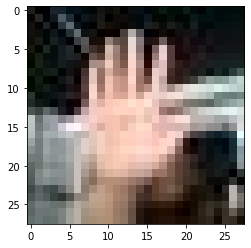

In [12]:
plt.imshow(x_train[4000])
print('라벨: ', y_train[4000])

print('x_train 배열', x_train.shape, sep='\n')
print('y_train 배열',y_train.shape, sep='\n')

라벨:  2
x_test 배열
(360, 28, 28, 3)
y_test 배열
(360,)


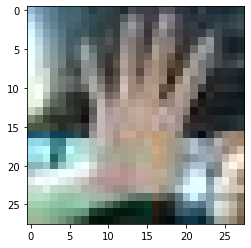

In [13]:
plt.imshow(x_test[359])
print('라벨: ', y_test[359])

print('x_test 배열', x_test.shape, sep='\n')
print('y_test 배열',y_test.shape, sep='\n')


# 실패 사례: 흑백으로 변환해볼려했으나 실패했다(정확도가 높아지지않을까 싶었다)
# gray = cv2.cvtColor(x_test[359], cv2.COLOR_GRB_RGB2GRAY)
#module 'cv2.cv2' has no attribute 'COLOR_GRB_RGB2GRAY'가 나타났다.

# print(x_test[359].shape) 28 * 28 * 3이다.

## 정확도 테스트 하기

In [39]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [41]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (4001, 28, 28, 3)
Before Reshape - x_test_norm shape: (360, 28, 28, 3)
After Reshape - x_train_reshaped shape: (4001, 28, 28, 3)
After Reshape - x_test_reshaped shape: (360, 28, 28, 3)


In [43]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=5)

Epoch 1/5
126/126 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9928
Epoch 2/5
126/126 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9880
Epoch 3/5
126/126 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9970
Epoch 4/5
126/126 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9953
Epoch 5/5
126/126 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9948


# 결과

In [44]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 5.9706 - accuracy: 0.5833
test_loss: 5.970602035522461 
test_accuracy: 0.5833333134651184


In [45]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.5800960e-01 4.1990444e-02 1.4822102e-15 2.5409603e-18 4.8556763e-17
 4.6826311e-15 2.0924812e-19 3.6518132e-19 6.3530935e-20 3.4987236e-15]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


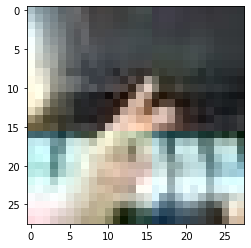

In [46]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.0395037e-03 9.8680091e-01 6.1596553e-03 3.4687247e-12 6.3095240e-14
 1.4904977e-12 1.7242314e-13 5.4720912e-15 2.8847037e-13 3.7203903e-12]
라벨: 2, 예측결과:1


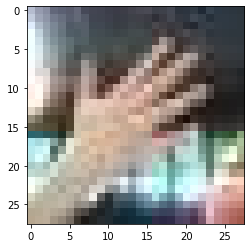

예측확률분포: [7.7840858e-03 9.9221593e-01 4.6838892e-14 1.0590274e-17 6.0918874e-17
 4.7317022e-15 4.4195335e-19 4.5993227e-19 4.8660140e-19 4.5207089e-15]
라벨: 2, 예측결과:1


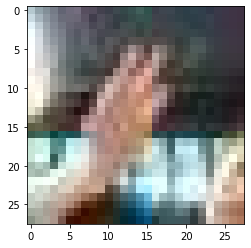

예측확률분포: [6.8372440e-01 3.1624371e-01 3.1830386e-05 3.8619823e-14 1.9412297e-15
 1.9544808e-12 5.4287379e-15 4.1303757e-15 9.1462474e-15 3.6957883e-13]
라벨: 2, 예측결과:0


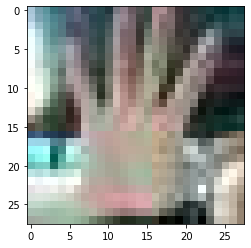

예측확률분포: [9.0171897e-01 9.8280966e-02 1.2932943e-08 6.0218660e-15 1.8152035e-15
 3.5671745e-13 1.2634995e-15 5.9969247e-15 8.3291090e-16 1.9999962e-13]
라벨: 2, 예측결과:0


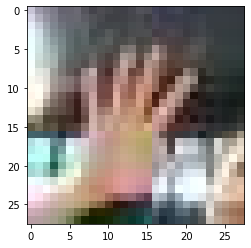

예측확률분포: [5.1051915e-01 4.8948085e-01 1.0730052e-11 2.2755823e-17 4.2379080e-17
 1.4678447e-14 3.7298657e-18 1.6792860e-17 2.2057118e-18 6.6099902e-15]
라벨: 2, 예측결과:0


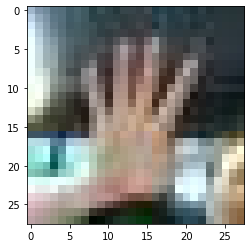

In [47]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과:" + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 실패 사례 모음

 1. 이미지를 흑백으로 변환해볼려했으나 실패했다(정확도가 높아지지않을까 싶었다)
     - gray = cv2.cvtColor(x_test[359], cv2.COLOR_GRB_RGB2GRAY)
     - #module 'cv2.cv2' has no attribute 'COLOR_GRB_RGB2GRAY'가 나타났다.
     - print(x_test[359].shape) => 28 * 28 * 3이다.